<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Рабочий-процесс-машинного-обучения" data-toc-modified-id="Рабочий-процесс-машинного-обучения-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Рабочий процесс машинного обучения</a></span></li><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Функции" data-toc-modified-id="Функции-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Функции</a></span></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обработка данных</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-и-проверка-данных" data-toc-modified-id="Выгрузка-и-проверка-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выгрузка и проверка данных</a></span></li><li><span><a href="#Типы-данных-и-пропуски" data-toc-modified-id="Типы-данных-и-пропуски-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Типы данных и пропуски</a></span></li><li><span><a href="#Удаление-лишних-признаков-на-основе-анализа-уникальных-значений" data-toc-modified-id="Удаление-лишних-признаков-на-основе-анализа-уникальных-значений-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Удаление лишних признаков на основе анализа уникальных значений</a></span></li><li><span><a href="#Корректировка-типа-данных" data-toc-modified-id="Корректировка-типа-данных-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Корректировка типа данных</a></span></li><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li><li><span><a href="#Корректировка-содержимого-данных" data-toc-modified-id="Корректировка-содержимого-данных-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Корректировка содержимого данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(Exploratory-Data-Analysis)-EDA" data-toc-modified-id="Исследовательский-анализ-данных-(Exploratory-Data-Analysis)-EDA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследовательский анализ данных (Exploratory Data Analysis) EDA</a></span></li></ul></div>

## Введение

Используйте предоставленные данные об энергопотреблении здания для разработки модели, которая может предсказать показатель энергетической эффективности здания, а затем интерпретировать результаты, чтобы найти переменные, которые наиболее точно предсказывают оценку.

Это контролируемая задача регрессионного машинного обучения: учитывая набор данных с включенными целями (в данном случае оценка), мы хотим обучить модель, которая может научиться сопоставлять функции (также известные как объясняющие переменные) с целью.

Контролируемая проблема: нам даны как функции, так и цель
Проблема регрессии: целью является непрерывная переменная, в данном случае в диапазоне от 0 до 100
Во время обучения мы хотим, чтобы модель изучила взаимосвязь между функциями и оценкой, поэтому мы даем ей как функции, так и ответ. Затем, чтобы проверить, насколько хорошо модель усвоила урок, мы оцениваем ее на тестовом наборе, где она никогда не видела ответов!

## Рабочий процесс машинного обучения

<div class="alert alert-info"> <b>info</b>
    
В общем случае процесс решения задач возникающих в машинном обучении состоит из следующих этапов:

1. Очистка и форматирование данных
0. Предварительный анализ данных
0. Выбор наиболее полезных признаков и создание новых более репрезентативных
0. Сравнение качества работы нескольких моделей
0. Оптимизация гиперпараметров в лучшей модели
0. Проверка модели на тестовой выборке
0. Интерпретация результатов
0. Итоговое представление результатов работы

Заблаговременная настройка структуры конвейера позволяет увидеть, как один шаг перетекает в другой. Однако конвейер машинного обучения - это итеративная процедура, и поэтому мы не всегда выполняем эти шаги линейно. Мы можем вернуться к предыдущему шагу, основываясь на результатах дальнейшего продвижения по конвейеру. Например, после того, как выполнили выбор объектов перед построением каких-либо моделей, мы можем использовать результаты моделирования, чтобы вернуться назад и выбрать другой набор объектов. 

<div class="alert alert-block alert-warning"> <b>warning</b>
    
Моделирование может привести к неожиданным результатам, которые означают, что мы хотим изучить наши данные под другим углом. Как правило, мы должны выполнить один шаг, прежде чем переходить к следующему.

## Импорт данных

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

from datetime import date, timedelta, datetime

import copy
import re

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

## Функции

In [2]:
def what_columns_need_to_drop_analyze(unique_count=0):
    columns_to_drop = [column for column in data.columns if len(data[column].unique()) == unique_count]

    for column in columns_to_drop:
        print(column)
        print(data[column].unique())
    
    return columns_to_drop

In [3]:
def missing_values(df, with_min_max=True):
    """Вычисление аномалий в датасете, включая минимальные и максимальные значения"""  
    columns_for_df = [
        'NaN_part_%', 'empty_counts', 'space_counts', '0_counts', 'unique_counts', 'min_value', 'max_value', 'dupl_sum', 'dtypes', 'length'
    ]
    if with_min_max:
        data = pd.DataFrame(columns=columns_for_df, index=df.columns)
    else:
        del columns_for_df[5:7]
        data = pd.DataFrame(columns=columns_for_df, index=df.columns)
    for column in df.columns:
        data['NaN_part_%'][column] = df[column].isnull().mean() * 100
        data['empty_counts'][column] = df[df[column] == ''][column].count()
        data['space_counts'][column] = df[df[column] == ' '][column].count()
        data['0_counts'][column] = df[df[column] == 0][column].count()
        data['unique_counts'][column] = len(df[column].unique())
        if with_min_max:
            data['min_value'][column] = df[column].min()
            data['max_value'][column] = df[column].max()
        data['dupl_sum'][column] = df[column].duplicated().sum()
        data['dtypes'][column] = df[column].dtypes
        data['length'][column] = len(df[column])
    print(f'Размеры датафрейма: {df.shape}')
    return data    

## Обработка данных

### Выгрузка и проверка данных

Выгружу данные формата .csv [отсюда](https://www.opendatanetwork.com/dataset/data.cityofnewyork.us/utpj-74fz) в структуру датафрейма библиотеки pandas. Данные обширны, более 260 признаков и максимально приближены к реальным.

In [4]:
# Read in data into a dataframe 
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Display top of dataframe
data.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Count of Buildings,Address 1,Address 2,City,County,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,ENERGY STAR Certification - Year(s) Certified,ENERGY STAR Certification - Last Approval Date,ENERGY STAR Certification - Eligibility,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),% Difference from National Median Site EUI,Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Source Energy Use (kBtu),National Median Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),% Difference from National Median Source EUI,Source Energy Use - Adjusted to Current Year (kBtu),Weather Normalized Source Energy Use (kBtu),National Median Source Energy Use (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Kerosene Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),National Median Total GHG Emissions (Metric Tons CO2e),Estimated Data Flag - Electricity (Grid Purchase),Estimated Data Flag - Natural Gas,Estimated Data Flag - Fuel Oil (No. 2),Estimated Data Flag - Fuel Oil (No. 4),Estimated Data Flag - Fuel Oil (No. 5 and No. 6),Estimated Data Flag - District Steam,eGRID Output Emissions Rate (kgCO2e/MBtu),Net Emissions (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,% Difference from National Median Water/Wastewater Site EUI,CoStar Property ID,LEED US Project ID,Date Property Last Modified,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Automobile Dealership - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),Bank Branch - Number of Computers,College/University - Gross Floor Area (ft²),College/University - Number of Computers,Convenience Store with Gas Station - Gross Floor Area (ft²),Convention Center - Gross Floor Area (ft²),Courthouse - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - PDU Input Meter (kWh),Data Center - PDU Output Meter (kWh),Data Center - IT Equipment Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Data Center - PUE,Data Center - National Median PUE,Data Center - UPS Output Meter (kWh),Data Center - Cooling Equipment Redundancy,Data Center - IT Energ

In [5]:
data.shape

(16378, 262)

Мы получили первые сырые данные. Можно увидеть с какими проблемами сталкиваемся. В таблице 244 признака и 16090 строк. Достаточно большое количество данных и их нужно будет обработать. Нам не известно, что означают большинство признаков. Все, что мы знаем из постановки задачи, - это то, что мы хотим предсказать число в столбце оценки `ENERGY STAR Score`. Это рейтинг от 1 до 100 процентов для определенных типов зданий, рассчитанный на основе данных о потреблении энергии за отчетный год.

На другие данные смотреть не будем, попробуем поработать с ними без понимания их сущности.

Посмотрим на формат данных. 

### Типы данных и пропуски

In [6]:
data.iloc[:, :100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16378 entries, 0 to 16377
Data columns (total 100 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Property Id                                                                         16378 non-null  int64  
 1   Property Name                                                                       16378 non-null  object 
 2   Parent Property Id                                                                  16378 non-null  object 
 3   Parent Property Name                                                                16378 non-null  object 
 4   Year Ending                                                                         16378 non-null  object 
 5   NYC Borough, Block and Lot (BBL)                                                    16378 non-

In [7]:
data.iloc[:, 101:200].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16378 entries, 0 to 16377
Data columns (total 99 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   Data Center - PDU Input Meter (kWh)                                                                              16378 non-null  object
 1   Data Center - PDU Output Meter (kWh)                                                                             16378 non-null  object
 2   Data Center - IT Equipment Input Meter (kWh)                                                                     16378 non-null  object
 3   Data Center - IT Site Energy (kWh)                                                                               16378 non-null  object
 4   Data Center - IT Source Energy (kBtu)   

In [8]:
data.iloc[:, 201:300].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16378 entries, 0 to 16377
Data columns (total 61 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Retail Store - Walk-in Refrigeration Density (Number per 1,000 ft²)                               16378 non-null  object 
 1   Retail Store - Percent That Can Be Cooled                                                         16378 non-null  object 
 2   Retail Store - Open or Closed Refrigeration Density (Number per 1,000 ft²)                        16378 non-null  object 
 3   Retail Store - Number of Walk-in Refrigeration/Freezer Units                                      16378 non-null  object 
 4   Retail Store - Number of Open or Closed Refrigeration/Freezer Units                               16378 non-null  object 
 5

Уже при просмотре фрейма данных может возникнуть проблема, поскольку отсутствующие значения кодируются как `'Not Available'`, а не как `np.nan` (не число). Это означает, что столбцы с числами не будут представлены как числовые, поскольку pandas преобразует столбцы с любыми строковыми значениями в столбцы всех строк.

### Удаление лишних признаков на основе анализа уникальных значений

Уменьшаем количество признаков за счет того, что в 12 признаках уникальных значений = 1. Эти признаки никак не поспособствует улучшению модели, слишком мало записей в признаках. Поэтому было решено их удалить.

In [9]:
columns_to_drop = what_columns_need_to_drop_analyze(unique_count=1)
    
data = data.drop(columns=columns_to_drop)
print(data.shape)

Year Ending
['12/31/2016']
National Median ENERGY STAR Score
[50]
Kerosene Use (kBtu)
['Not Available']
Propane Use (kBtu)
['Not Available']
% Difference from National Median Water/Wastewater Site EUI
['Not Available']
CoStar Property ID
['Not Available']
Convenience Store with Gas Station - Gross Floor Area (ft²)
['Not Available']
Convention Center - Gross Floor Area (ft²)
['Not Available']
Data Center - PUE
['Not Available']
Convenience Store With Gas Station - Number of Open or Closed Refrigeration/Freezer Units
['Not Available']
Convenience Store With Gas Station - Open or Closed Refrigeration Density (Number per 1,000 ft²)
['Not Available']
% Difference from National Median Water/Wastewater Source  EUI
['Not Available']
(16378, 250)


Рассматриваю данные, в которых уникальных значений 2. Явно, что 
- Data Center - PDU Output Meter (kWh)
- Data Center - IT Equipment Input Meter (kWh)
- Data Center - National Median PUE
- Energy/Power Station - Gross Floor Area (ft²)
- Estimated Data Flag -  Municipally Supplied Reclaimed Water – Outdoor Use

не пригодятся для анализа. Одно из двух значений у признаков np.nan

<!-- У признаков `['Alert - Data Center does not have an IT Meter', 'Alert - Property has no uses']` можно удалить записи с `'Possible Issue'`, затем удалить сам признак за ненадобностью. Записи с неопределенным состояним вроде "возможные проблемы" считаю, что нужно удалить. 

`Temporary Values` необходимо удалить. Что подразумевается под названием признака не ясно, но "временных значений" всего 288. Попробую удалить их, а признак убрать.

Признаки `'ENERGY STAR Certification - Eligibility' и 'Data Quality Checker Run?'` пока оставлю для дальнейшего анализа. Возможно признаки будут иметь значимость. -->

In [10]:
columns_to_drop = what_columns_need_to_drop_analyze(unique_count=2)

list_not_to_drop_after_visual_checking = [
    'ENERGY STAR Certification - Eligibility', 'Data Quality Checker Run?', 'Alert - Property has no uses', 
    'Alert - Data Center does not have an IT Meter', 'Temporary Values'
]

for column in list_not_to_drop_after_visual_checking:
    columns_to_drop.remove(column)

data = data.drop(columns=columns_to_drop)
print(data.shape)

ENERGY STAR Certification - Eligibility
['No' 'Yes']
Data Center - PDU Output Meter (kWh)
['Not Available' '0']
Data Center - IT Equipment Input Meter (kWh)
['Not Available' '0']
Data Center - National Median PUE
['Not Available' '1.8']
Energy/Power Station - Gross Floor Area (ft²)
['Not Available' '1600']
Estimated Data Flag -  Municipally Supplied Reclaimed Water – Outdoor Use
['Not Available' 'No']
Alert - Data Center does not have an IT Meter
['Ok' 'Possible Issue']
Alert - Property has no uses
['Ok' 'Possible Issue']
Data Quality Checker Run?
['Yes' 'No']
Temporary Values
['No' 'Yes']
(16378, 245)


На всякий случай необходимо проверить признаки, в которых 3 уникальных значений.

In [11]:
columns_to_drop = what_columns_need_to_drop_analyze(unique_count=3)

District Hot Water Use (kBtu)
['Not Available' '60474599.1' '10680199.6']
Estimated Data Flag - Electricity (Grid Purchase)
['Yes' 'No' 'Not Available']
Estimated Data Flag - Natural Gas
['No' 'Yes' 'Not Available']
Estimated Data Flag - Fuel Oil (No. 2)
['Not Available' 'No' 'Yes']
Estimated Data Flag - Fuel Oil (No. 4)
['Not Available' 'No' 'Yes']
Estimated Data Flag - Fuel Oil (No. 5 and No. 6)
['Not Available' 'No' 'Yes']
Estimated Data Flag - District Steam
['Not Available' 'No' 'Yes']
Hospital (General Medical & Surgical) - Laboratory
['Not Available' '100% Yes' 'No']
Hospital (General Medical & Surgical) - Onsite Laundry Facility
['Not Available' '100% Yes' 'No']
Hospital (General Medical & Surgical) - Owned By
['Not Available' 'Non Profit' 'For Profit']
Hospital (General Medical & Surgical) - Percent That Can Be Cooled
['Not Available' '100' '80']
Hospital (General Medical & Surgical) - Percent That Can Be Heated
['Not Available' '100' '80']
Hospital (General Medical & Surgical

Итого по анализу данных на основе уникальных значений было решено удалить: 

1. Признаки, в которых уникальных значений всего 1.
2. Признаки, в которых уникальных значений 2, но один из них `np.nan`.

Остальные признаки пока оставлены. Будут отсеяны другими инструментами.

### Корректировка типа данных

Данные датафрейма необходимо привести к соответствующему типу данных. 

Сначала необходимо заменить строковое значение `'Not Available'` и `'Unable to Check (not enough data)'` на `np.nan`. Эти записи в данных встречаются часто, но не несут в себе никакого смысла. Результат не известен, поэтому можно заменить на `np.nan`.

Затем строковые типы данных привести к типу float и int там, где это возможно.

In [12]:
data = data.replace({'Not Available': np.nan})
data = data.replace({'Unable to Check (not enough data)': np.nan})

In [13]:
numeric_columns = [
    'ft²', 'kBtu', 'kgal', '%', 'therms', 'kWh', 'Metric Tons CO2e', 'MBtu', 'Percent', 'Hours', 'a(s)', 'Units', 'Score'
]
float_list = []

for column in list(data.columns):
    for col in numeric_columns:
        if col in column:
            float_list.append(column)
            data[column] = data[column].astype(float)

Для изменения данных можно пойти с нескольких сторон. Для начала изменю тип данных по ключевым субстрокам, которые являются метрическими. Визуально выбрал набор ключевых метрических субстрок и добавил их в список. По списку в цикле пробежался и изменил тип данных.

Все потенциально числовые признаки были переведены в тип float. Идея выявления таких признаков заключается в использовании метрических указателей в названии признаков. Если есть упоминание на количественное измерение, то логично предположить, что сами признаки числовые. 

Перевод произошел успешно, следовательно гипотеза была верно. Теперь необходимо проверить оставшиеся признаки, возможно что-то осталось упущенным.

In [14]:
data[set(list(data.columns)).difference(float_list)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16378 entries, 0 to 16377
Data columns (total 88 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Data Center - IT Energy Configuration                                      86 non-null     object 
 1   Alert - Gross Floor Area is 0 ft2                                          16370 non-null  object 
 2   Medical Office - Number of Workers on Main Shift                           620 non-null    object 
 3   Longitude                                                                  15648 non-null  float64
 4   Estimated Data Flag - Natural Gas                                          14615 non-null  object 
 5   Multifamily Housing - Resident Population Type                             7353 non-null   object 
 6   Estimated Data Flag - Fuel Oil (No. 4)                

Следующим шагом необходимо посмотреть оставшиеся признаки и визуально выявить те, тип данных которых надо изменить. Выпишу эти колонки и добавлю их в список, по которому произведу трансформацию типа данных. 

In [15]:
for column in set(list(data.columns)).difference(float_list):
    print(f'{column} | {data[column].dtype} | ', data[column].unique())
    print('---------------------------------------------------------------------------------------------')

Data Center - IT Energy Configuration | object |  [nan
 'Uninterruptible Power Supply (UPS) supports only IT Equipment (preferred)'
 'Facility Has No UPS'
 'UPS, including non-IT load greater than 10% - load not submetered'
 'UPS, including non-IT load greater than 10% - load submetered'
 'Uninterruptible Power Supply (UPS) supports only IT Equipment (preferred), UPS, including non-IT load less than 10%'
 'UPS, including non-IT load less than 10%']
---------------------------------------------------------------------------------------------
Alert - Gross Floor Area is 0 ft2 | object |  ['Ok' 'Possible Issue' nan]
---------------------------------------------------------------------------------------------
Medical Office - Number of Workers on Main Shift | object |  [nan '459.28' '21.1' '5' '500' '486' '4' '3' '6.6' '161' '3.96' '497'
 '320' '1000' '76' '4.95' '12' '8' '40' '3.99' '10.6' '21.01' '7.43'
 '13.03' '5.06' '15' '1' '6' '18' '112' '29' '20.62' '9' '14' '22' '13'
 '140.92' '2'

In [16]:
list_to_float = [
    'Medical Office - Number of Workers on Main Shift', 
    'Hospital (General Medical & Surgical) - Licensed Bed Capacity',
    'Bank Branch - Number of Computers',
    'Office - Number of Workers on Main Shift',
    'Office - Number of Computers',
    'Financial Office - Number of Workers on Main Shift',
    'Other - Number of Computers',
    'Hospital (General Medical & Surgical)- Full Time Equivalent (FTE) Workers',
    'Other - Number of Workers on Main Shift',
    'Hospital (General Medical & Surgical) - Number of Staffed Beds',
    'Hospital (General Medical & Surgical) - Number of Workers on Main Shift',
    'Financial Office - Number of Computers',
    'Multifamily Housing - Number of Bedrooms',
]

list_to_int = [
    'Hospital (General Medical & Surgical) - Number of MRI Machines',
    'Medical Office - Number of MRI Machines',
    'Count of Buildings',
    'Council District',
    'College/University - Number of Computers',
    'Community Board',
    'Hospital (General Medical & Surgical) - Maximum Number of Floors'
]

In [17]:
data['Postcode'] = data['Postcode'].astype(str)
data[list_to_float] = data[list_to_float].astype(float)
data[list_to_int] = data[list_to_int].astype(float)

Вроде бы все типы данных привел правильно. В действительности лучше пробежаться визуально еще раз и убедиться в правильности действий. Заодно более детально познакомиться с признаками датафрейма.

В ходе исследования было замечано, что в признаке `County` названия округов отличаются в зависимости от регистра. К примеру, есть округ `queen`, а есть `QUEEN`. Надо будет обработать данные.

Кроме этого, замечены признаки типа object, но имеющую по факту и названию формат даты. Такие колонки необходимо будет обработать и создать либо новые признаки на базе старых, либо удалить.

In [18]:
data.describe()

,Property Id,Count of Buildings,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),% Difference from National Median Site EUI,Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Source Energy Use (kBtu),National Median Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),% Difference from National Median Source EUI,Source Energy Use - Adjusted to Current Year (kBtu),Weather Normalized Source Energy Use (kBtu),National Median Source Energy Use (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Net Emissions (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Automobile Dealership - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),Bank Branch - Number of Computers,College/University - Gross Floor Area (ft²),College/University - Number of Computers,Courthouse - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - PDU Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Data Center - UPS Output Meter (kWh),Distribution Center - Gross Floor Area (ft²),Enclosed Mall - Gross Floor Area (ft²),Fast Food Restaurant - Gross Floor Area (ft²),Financial Office - Gross Floor Area (ft²),Financial Office - Number of Computers,Financial Office - Number of Workers on Main Shift,Financial Office - Weekly Operating Hours,Fitness Center/Health Club/Gym - Gross Floor Area (ft²),Food Sales - Gross Floor Area (ft²),Food Service - Gross Floor Area (ft²),Hospital (General Medical & Surgical)- Full Time Equivalent (FTE) Workers,"Hospital (General Medical & Surgical) - Full Time Equivalent (FTE) Workers Density (Number per 1,000 ft²)",Hospital (General Medical & Surgical) - Gross Floor Area (ft²),Hospital (General Medical & Surgical) - Licensed Bed Capacity,"Hospital (General Medical & Surgical) - Licensed Bed Capacity Density (Number per 1,000 ft²)",Hospital (General Medical & Surgical) - Maximum Number of Floors,"Hospital (General Medical & Surgical) - MRI Density (Number per 1,000 ft²)",Hospital (General Medical & Surgical) - Number of MRI Machines,Hospital (General Medical & Surgical) - Number of Staffed Beds,Hospital (General Medical & Surgical) - Number of Workers on Main Shift,"Hospital (General Medical & Surgical) - Number of Workers on Main Shift Density (Number per 1,000 ft²)",Hospital (General Medical & Surgical) - Percent That Can Be Cooled,Hospital (General Medi

Из исследования минимальных и максимальных значений, а также статистики для каждого признака видно, что некоторые признаки имеют ложные данные. 

К примеру признак `'Year Built'` имеет минимальное значение 1000. Подразумевается, что здание построено в 1000 году н. э.

### Обработка пропущенных значений

Переходим к анализу пропущенных значений. Задача состоит в том, чтобы посмотреть более детально данные и сделать предобработку на оснований умозаключений при работе с данными. 

Используем функцию выявления пропущенных значений и проводим исследования

In [19]:
missing_data = missing_values(data, with_min_max=False)
missing_data.sort_values('NaN_part_%', ascending=False)

Размеры датафрейма: (16378, 245)


,NaN_part_%,empty_counts,space_counts,0_counts,unique_counts,dupl_sum,dtypes,length
District Hot Water Use (kBtu),99.987788,0,0,0,3,16375,float64,16378
Ambulatory Surgical Center - Gross Floor Area (ft²),99.981683,0,0,0,4,16374,float64,16378
Third Party Certification,99.969471,0,0,0,3,16375,object,16378
Third Party Certification Date Anticipated,99.969471,0,0,0,6,16372,object,16378
Third Party Certification Date Achieved,99.969471,0,0,0,6,16372,object,16378
Automobile Dealership - Gross Floor Area (ft²),99.95726,0,0,0,8,16370,float64,16378
Mailing Center/Post Office - Gross Floor Area (ft²),99.951154,0,0,0,9,16369,float64,16378
Movie Theater - Gross Floor Area (ft²),99.951154,0,0,0,8,16370,float64,16378
Adult Education - Gross Floor Area (ft²),99.945048,0,0,0,10,16368,float64,16378
Wholesale Club/Supercenter- Gross Floor Area (ft²),99.938942,0,0,0,11,16367,float64,16378


Настало время проверить весь датафрейм по количеству дефектных данных. Для этого была написана функция, которая позволяет в удобном формате смотреть на метаданные нашей таблицы. 

Заметно, что в большом случае признаков много отсутствующих данных, вплоть до 99% всех данных. Это слишком высокий процент. 

В идеальном случае, необходимо идти к Заказчику и уточнить этот момент: 
1. Возможно, запросить новые данные, так как выгрузка оказалась, к примеру, ошибочной. 
2. Возможно, среди признаков с высоким уровнем отсутствующих значений есть критически важный для бизнеса и его стоит оставить.

В нашем случае Заказчика нет, это самостоятельный исследовательский проект. Поэтому решаю удалить все данные, где пропущенных значений выше 56%. Цифра взята исходя из соображений, что есть большой разрыв по пропущенным значениям в сортированной таблице `missing_data` между признаками `2nd Largest Property Use - Gross Floor Area (ft²)` (72.4%) и `Multifamily Housing - Resident Population Type` (55.1%).

Все признаки с пропущенными значениями ниже 56% решил оставить для дальнейшего исследования, не смотря на то, что цифра 56% является все равно достаточно высокой. 

Так же было решено удалить те признаки, где количество нулей больше 75%. Для обучающей модели это слишком большой дисбаланс классов.

Сумма 0 значений в таблице достаточно большое, если учитывать, что размер датафрейма 16378. Необходимо посмотреть на таблицу и убедиться, что нет записей, наполненные одними нулями. 

Если такие записи есть и процент заполнения нулями больше 75%, то для модели она становится малоинформативной и ее следует удалить. Визуально были найдены такие записи:
1. `Percent of Electricity that is Green Power`
2. `Green Power - Offsite (kWh)`
3. `Avoided Emissions - Offsite Green Power (Metric Tons CO2e)`

В этих записях процент заполнения нулями превышает 90%. Если для Заказчика эти признаки не являются критичными, то их можно удалить.

In [20]:
list_columns_to_drop = list(
    missing_data[missing_data['NaN_part_%'] > 42].index 
    | missing_data[missing_data['0_counts'] / missing_data['length'] * 100 > 75].index
    | missing_data[missing_data['empty_counts'] / missing_data['length'] * 100 > 75].index
    | missing_data[missing_data['space_counts'] / missing_data['length'] * 100 > 75].index
    | missing_data[missing_data['unique_counts'] <= 1].index
)
len_df = data.shape[1]
print(f'Размер датасета до удаления колонок: {data.shape}')
data = data.drop(columns = list_columns_to_drop)
print(f'Размер датасета после удаления колонок: {data.shape}')
print(f'Удалено {len(list_columns_to_drop)} или {abs(data.shape[1] - len_df) / len_df * 100:.2f}% признаков')

Размер датасета до удаления колонок: (16378, 245)
Размер датасета после удаления колонок: (16378, 88)
Удалено 157 или 64.08% признаков


В результате небольшого исследования удалось уменьшить размер признакового пространства на 64%. Это позволит значительно облегчить дальнейшие исследования.

Займусь исследованием минимальных и максимальных значений признаков. Для этого признаки с типом данных `object` надо явно представить как `object`. Сейчас значения `np.nan` мешают этому.

In [21]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].replace({np.nan: 'nan'})

missing_data = missing_values(data, with_min_max=True)
missing_data.sort_values('NaN_part_%', ascending=False)

Размеры датафрейма: (16378, 88)


,NaN_part_%,empty_counts,space_counts,0_counts,unique_counts,min_value,max_value,dupl_sum,dtypes,length
"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 ft²)",37.416046,0,0,4663,5079,0.0,17.40238,11299,float64,16378
"Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 ft²)",37.40994,0,0,7030,3083,0.0,1000.0,13295,float64,16378
"Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 ft²)",37.40994,0,0,4,8359,0.0,1000.0,8019,float64,16378
"Multifamily Housing - Number of Bedrooms Density (Number per 1,000 ft²)",37.403834,0,0,44,7993,0.0,1360.0,8385,float64,16378
Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),37.403834,0,0,4665,355,0.0,3144.0,16023,float64,16378
Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories),37.397729,0,0,7032,633,0.0,10914.0,15745,float64,16378
Multifamily Housing - Total Number of Residential Living Units,37.397729,0,0,5,1351,0.0,10914.0,15027,float64,16378
Multifamily Housing - Number of Bedrooms,37.391623,0,0,45,2146,0.0,21828.0,14232,float64,16378
Multifamily Housing - Gross Floor Area (ft²),37.379411,0,0,1,8230,0.0,27882654.0,8148,float64,16378
Source EUI - Adjusted to Current Year (kBtu/ft²),21.760899,0,0,11,2937,0.0,912801.1,13441,float64,16378


In [22]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].replace({'nan': np.nan})

Проверю метаданные агрегирующей функцией.

In [23]:
print(f"Сумма пустых значений в таблице: {missing_data['empty_counts'].sum()}")
print(f"Сумма пробелов в таблице: {missing_data['space_counts'].sum()}")
print(f"Сумма 0 значений в таблице: {missing_data['0_counts'].sum()}")
print(f"Минимальное количество уникальных значений в таблице: {missing_data['unique_counts'].min()}")
print(f"Максимальное количество уникальных значений в таблице: {missing_data['unique_counts'].max()}")

Сумма пустых значений в таблице: 0
Сумма пробелов в таблице: 0
Сумма 0 значений в таблице: 28898
Минимальное количество уникальных значений в таблице: 2
Максимальное количество уникальных значений в таблице: 16339


Осталось проверить дисбаланс классов. Если любой класс признака имеет подавляющее большинство, то имеет смысл этот признак удалить. 

In [24]:
list_to_drop = []
for column in data.columns:
    class_frequency = data[column].astype(str).value_counts(normalize=True)
    if class_frequency[0] * 100 > 75:
        print(f'{class_frequency[0] * 100:.2f} | {column}')
        list_to_drop.append(column)

96.42 | Parent Property Id
96.42 | Parent Property Name
95.13 | Number of Buildings
92.60 | Occupancy
99.13 | Metered Areas (Energy)
88.21 | ENERGY STAR Certification - Eligibility
96.67 | Estimated Data Flag - Electricity (Grid Purchase)
87.79 | Estimated Data Flag - Natural Gas
98.24 | eGRID Output Emissions Rate (kgCO2e/MBtu)
99.90 | Alert - Data Center does not have an IT Meter
99.93 | Alert - Gross Floor Area is 0 ft2
91.13 | Alert - Individual monthly meter entry is more than 65 days long
98.04 | Alert - Meter has overlaps
98.07 | Alert - Meter has gaps
85.73 | Alert - Meter has less than 12 full calendar months of data
97.04 | Alert - No meters are associated with this property
99.98 | Alert - Property has no uses
75.66 | Data Quality Checker Run?
95.99 | Estimated Values - Energy
98.24 | Temporary Values


In [25]:
data = data.drop(columns=list_to_drop)
print(
    f'Количество удаленных признаков: {len(list_to_drop)}. В процентном отношении это '
    f'{len(list_to_drop) / (data.shape[1] + len(list_to_drop)) * 100:.2f}%'
)

Количество удаленных признаков: 20. В процентном отношении это 22.73%


Замечено, что в признаках используются координаты зданий: `Latitude` и `Longitude`. Для машинного обучения эти данные сложны для интерпретации и будут ложно поняты. 

В данном случае попробовать изменить признаки на зоны, определенных размеров не имеют смысла. У нас имеется уже признак `County`, в котором содержатся названия районов. Детализировать или вводить дублирующий признак не стоит на мой взгляд.

Необходимо удалить признаки `Latitude` и `Longitude`

In [26]:
coordinate_columns = ['Latitude', 'Longitude']
data = data.drop(columns=coordinate_columns)

### Корректировка содержимого данных

В ходе анализа данных было выявлен ряд некорректных отображений содержимого признаков. Не смотря на то, что полного описания признаков нет, можно догадываться о его содержимом. Там где это возможно необходимо данные почистить и подготовить к дальнейшему анализу.

Идеи, выявленные на стадии изучения данных:
1. Обработать даты
2. поработать с регистром. К примеру признак `County` - явно повторы округов есть
3. Некоторые признаки имеют ложные данные. К примеру признак 'Year Built' имеет минимальное значение 1000. Подразумевается, что здание построено в 1000 году н. э.
4. Отрицательное минимальное значение величины
5. '% Difference ...' отличается сильно от максимально возможной величины 100%

Для начала выведу все признаки типа object и визуально посмотрю насколько их содержимое соответствует хотя бы примерно названию. Те признаки, в которых сложно понять правильно ли содержимое буду пропускать. В реальной ситуации необходимо было бы уточнить вопрос у Заказчика.

In [27]:
list_with_objects = []
for column in data.columns:
    if data[column].dtype == 'object':
        list_with_objects.append(column)

for element in list_with_objects:
    print(f'{element} | {data[element].dtype}')
    display(data[element].unique)
    print('--------------------------------------------------------')

Property Name | object


<bound method Series.unique of 0                                   Spring Creek Gardens
1                                        Castle Hill Ave
2        STB044283 St Barnabas Nursing Home 4428 3rd Ave
3             STB044003 St Barnabas Parking 4400 3rd Ave
4              STB044873 St Barnabas Clinic 4487 3rd Ave
                              ...                       
16373                73R65-Nyc Battery Park Ritz Carlton
16374                            St. Joseph Hill Academy
16375                            St. Joseph Hill Convent
16376                  St. Mary's Home for Working Girls
16377                                    Peartree Square
Name: Property Name, Length: 16378, dtype: object>

--------------------------------------------------------
NYC Borough, Block and Lot (BBL) | object


<bound method Series.unique of 0        3-04516-7501
1        1-03573-0025
2        2-03064-0010
3        2-03064-0100
4        2-03051-0045
             ...     
16373             NaN
16374    5-03095-0021
16375    5-03095-0021
16376    1-01427-0011
16377    2-05141-0394
Name: NYC Borough, Block and Lot (BBL), Length: 16378, dtype: object>

--------------------------------------------------------
NYC Building Identification Number (BIN) | object


<bound method Series.unique of 0                                                  3323063
1                                                  2021926
2                                                  2094221
3                                                  2118236
4                                                  2011594
                               ...                        
16373                                                  NaN
16374                                              5113347
16375    5811602;5113344;5113345;5113347;5113343;581159...
16376                                              1043968
16377                                              2681207
Name: NYC Building Identification Number (BIN), Length: 16378, dtype: object>

--------------------------------------------------------
Address 1 | object


<bound method Series.unique of 0             901-903 Drew Street
1             604 Castle Hill Ave
2                    4428 3rd Ave
3                    4400 3rd Ave
4                 4487 3rd Avenue
                   ...           
16373               2 West Street
16374         850 Hylan Boulevard
16375         850 Hylan Boulevard
16376        225 East 72nd Street
16377    691 Co-Op City Boulevard
Name: Address 1, Length: 16378, dtype: object>

--------------------------------------------------------
City | object


<bound method Series.unique of 0             Brooklyn
1                Bronx
2                Bronx
3                Bronx
4                Bronx
             ...      
16373         New York
16374    Staten Island
16375    Staten Island
16376         New York
16377            Bronx
Name: City, Length: 16378, dtype: object>

--------------------------------------------------------
Postcode | object


<bound method Series.unique of 0        11208
1        10473
2        10457
3        10457
4        10457
         ...  
16373    10004
16374    10305
16375    10305
16376    10021
16377    10475
Name: Postcode, Length: 16378, dtype: object>

--------------------------------------------------------
Primary Property Type - Self Selected | object


<bound method Series.unique of 0                        Multifamily Housing
1                               Retail Store
2                  Residential Care Facility
3                                    Parking
4        Urgent Care/Clinic/Other Outpatient
                        ...                 
16373                                  Hotel
16374                            K-12 School
16375               Residence Hall/Dormitory
16376               Residence Hall/Dormitory
16377                           Retail Store
Name: Primary Property Type - Self Selected, Length: 16378, dtype: object>

--------------------------------------------------------
Primary Property Type - Portfolio Manager-Calculated | object


<bound method Series.unique of 0                        Multifamily Housing
1                               Retail Store
2                  Residential Care Facility
3                                    Parking
4        Urgent Care/Clinic/Other Outpatient
                        ...                 
16373                                  Hotel
16374                            K-12 School
16375               Residence Hall/Dormitory
16376               Residence Hall/Dormitory
16377                           Retail Store
Name: Primary Property Type - Portfolio Manager-Calculated, Length: 16378, dtype: object>

--------------------------------------------------------
National Median Reference Property Type | object


<bound method Series.unique of 0        Fannie Mae Industry Survey - Multifamily
1                            CBECS - Retail Store
2                                 CBECS - Nursing
3                                             NaN
4                       CBECS - Clinic/Outpatient
                           ...                   
16373                   CBECS - Hotel & Motel/Inn
16374     CBECS - Elementary/Middle & High School
16375                           CBECS - Dormitory
16376                           CBECS - Dormitory
16377                        CBECS - Retail Store
Name: National Median Reference Property Type, Length: 16378, dtype: object>

--------------------------------------------------------
List of All Property Use Types at Property | object


<bound method Series.unique of 0                            Multifamily Housing
1                                   Retail Store
2                      Residential Care Facility
3                                        Parking
4            Urgent Care/Clinic/Other Outpatient
                          ...                   
16373                                      Hotel
16374                                K-12 School
16375                   Residence Hall/Dormitory
16376                   Residence Hall/Dormitory
16377    Retail Store, Supermarket/Grocery Store
Name: List of All Property Use Types at Property, Length: 16378, dtype: object>

--------------------------------------------------------
Largest Property Use Type | object


<bound method Series.unique of 0                        Multifamily Housing
1                               Retail Store
2                  Residential Care Facility
3                                    Parking
4        Urgent Care/Clinic/Other Outpatient
                        ...                 
16373                                  Hotel
16374                            K-12 School
16375               Residence Hall/Dormitory
16376               Residence Hall/Dormitory
16377                           Retail Store
Name: Largest Property Use Type, Length: 16378, dtype: object>

--------------------------------------------------------
Date Property Last Modified | object


<bound method Series.unique of 0        02/01/2018 04:19 PM EST
1        09/13/2017 02:18 PM EDT
2        01/18/2018 11:12 AM EST
3        01/31/2018 01:36 PM EST
4        01/18/2018 11:38 AM EST
                  ...           
16373    08/07/2016 09:11 PM EDT
16374    08/07/2016 09:10 PM EDT
16375    08/07/2016 09:10 PM EDT
16376    08/07/2016 09:10 PM EDT
16377    08/07/2016 09:10 PM EDT
Name: Date Property Last Modified, Length: 16378, dtype: object>

--------------------------------------------------------
Default Values | object


<bound method Series.unique of 0         No
1        Yes
2         No
3         No
4         No
        ... 
16373     No
16374     No
16375     No
16376     No
16377    Yes
Name: Default Values, Length: 16378, dtype: object>

--------------------------------------------------------
Estimated Values - Water | object


<bound method Series.unique of 0        NaN
1        Yes
2        NaN
3        NaN
4        NaN
        ... 
16373    NaN
16374     No
16375     No
16376     No
16377    NaN
Name: Estimated Values - Water, Length: 16378, dtype: object>

--------------------------------------------------------
Water Current Date | object


<bound method Series.unique of 0               NaN
1        02/28/2017
2               NaN
3               NaN
4               NaN
            ...    
16373           NaN
16374    12/31/2016
16375    12/31/2016
16376    12/31/2016
16377           NaN
Name: Water Current Date, Length: 16378, dtype: object>

--------------------------------------------------------
Generation Date | object


<bound method Series.unique of 0        02/01/2018 04:24:22 PM
1        02/01/2018 03:21:51 PM
2        01/31/2018 11:38:36 PM
3        01/31/2018 11:38:36 PM
4        01/31/2018 11:38:37 PM
                  ...          
16373    02/22/2017 12:46:15 PM
16374    02/22/2017 12:37:31 PM
16375    02/22/2017 12:37:31 PM
16376    02/22/2017 12:32:59 PM
16377    02/21/2017 11:34:01 AM
Name: Generation Date, Length: 16378, dtype: object>

--------------------------------------------------------
Release Date | object


<bound method Series.unique of 0        02/01/2018 04:24:42 PM
1        02/01/2018 03:24:50 PM
2        01/31/2018 11:39:32 PM
3        01/31/2018 11:39:32 PM
4        01/31/2018 11:39:32 PM
                  ...          
16373    02/22/2017 01:33:26 PM
16374    02/22/2017 12:38:25 PM
16375    02/22/2017 12:38:25 PM
16376    02/22/2017 12:34:11 PM
16377    02/21/2017 11:35:49 AM
Name: Release Date, Length: 16378, dtype: object>

--------------------------------------------------------
Borough | object


<bound method Series.unique of 0         BROOKLYN
1            BRONX
2            BRONX
3            BRONX
4            BRONX
           ...    
16373    MANHATTAN
16374    STATEN IS
16375    STATEN IS
16376    MANHATTAN
16377        BRONX
Name: Borough, Length: 16378, dtype: object>

--------------------------------------------------------
NTA | object


<bound method Series.unique of 0                                          East New York
1        Soundview-Castle Hill-Clason Point-Harding Park
2                                           East Tremont
3                                           East Tremont
4                                     Claremont-Bathgate
                              ...                       
16373                  Battery Park City-Lower Manhattan
16374                    Grasmere-Arrochar-Ft. Wadsworth
16375                    Grasmere-Arrochar-Ft. Wadsworth
16376                        Lenox Hill-Roosevelt Island
16377                                         Co-op City
Name: NTA, Length: 16378, dtype: object>

--------------------------------------------------------


Первое что попадается на глаза это признак `NYC Borough, Block and Lot (BBL)`. Вот [здесь](https://www.nyc.gov/html/gbee/downloads/pdf/ggbp_weekly_digest_vol_8.pdf) написано, что номер bbl должен состоять из 10 цифр. 

Обработаю признак, добавлю  регулярные выражения и переведу его в правильный вид

In [28]:
column = 'NYC Borough, Block and Lot (BBL)'
data.loc[data[column].str.len() > 12, column] = np.nan
data.loc[data[column].str.len() < 10, column] = np.nan

In [29]:
def get_formatted_bbl(value):
    result = (
        re.fullmatch(r'(\d{1})(\d{5})(\d{4})', value) 
        or re.fullmatch(r'(\d{1})(\d{5})/(\d{4})', value)
        or re.fullmatch(r'(\d{1})(\d{5})-(\d{4})', value)
        or re.fullmatch(r'(\d{1})/(\d{5})/(\d{4})', value)
        or re.fullmatch(r'(\d{1})/(\d{5})(\d{4})', value)
        or re.fullmatch(r'(\d{1})-(\d{5})(\d{4})', value)
        or re.fullmatch(r'(\d{1})-(\d{5})/(\d{4})', value)
        or re.fullmatch(r'(\d{1})/(\d{5})-(\d{4})', value)
    )
    return '-'.join(result.groups()) if result else value

column = 'NYC Borough, Block and Lot (BBL)'

data[column] = data[column].replace({np.nan: 'nan'})
data[column] = data[column].map(get_formatted_bbl)
data[column] = data[column].replace({'nan': np.nan})

In [30]:
data[data[column].str.contains('|'.join([';|:|,|/']), na=False)]

,Property Id,Property Name,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),% Difference from National Median Site EUI,Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Source Energy Use (kBtu),National Median Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),% Difference from National Median Source EUI,Source Energy Use - Adjusted to Current Year (kBtu),Weather Normalized Source Energy Use (kBtu),National Median Source Energy Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),National Median Total GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Date Property Last Modified,Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,"Multifamily Housing - Number of Bedrooms Density (Number per 1,000 ft²)","Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 ft²)",Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories),"Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 ft²)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 ft²)",Default Values,Estimated Values - Water,Property GFA - Self-Reported (ft²),Property GFA - Calculated (Buildings and Parking) (ft²),Property GFA - Calculated (Buildings) (ft²),Water Current Date,Source EUI (kBtu/ft²),Source EUI - Adjusted to Current Year (kBtu/ft²),Generation Date,Release Date,Borough,Community Board,Council District,Census Tract,NTA


Что еще было замечено: признак `'NYC Building Identification Number (BIN)'`. Немного прогуглив, я нашел, что bin должен состоять из [7 цифр](https://locatenyc.io/detail-bin). При анализе признака были выявлены несоответствия по размерам bin номера и наличии лишних подстрок, таких как `;, :, /` и тд.

Все аномальные значения переведу в `not a number (np.nan)`.

In [31]:
column = 'NYC Building Identification Number (BIN)'
data.loc[data[column].str.contains('|'.join([';|:|,|/|-']), na=False), column] = np.nan
data.loc[data[column].str.len() != 7, column] = np.nan
# list(data[column].unique())

Теперь посмотрим на признак `City`. Данные разбивчаты, к примеру округ Бронкс. В признаки есть нарушения записей, такие как: 'beonx', 'ronx', 'bronx,' и тд.

In [32]:
def transformation(df):
    if 'bronx' in df.lower() or 'ronx' in df.lower() or 'beonx' in df.lower():
        return 'Bronx'
    if ('bro' in df.lower() and 'Bronx' not in df.lower() or 'klyn' in df.lower() or 'bookl' in df.lower()):
        return 'Brooklyn'
    if ('que' in df.lower() or 'quue' in df.lower()):
        return 'Queens'
    if 'manh' in df.lower() or '404' in df.lower() or '10' in df.lower():
        return 'Manhattan'
    if 'stat' in df.lower():
        return 'Staten Island'
    if 'flush' in df.lower() or 'fush' in df.lower():
        return 'Flushing'
    if 'maspeth' in df.lower():
        return 'Maspeth'
    if 'jack' in df.lower():
        return 'Jackson Heights'
    if 'jama' in df.lower():
        return 'Jamaica'
    if 'astor' in df.lower():
        return 'Astoria'
    if 'l.' in df.lower() or 'lic' in df.lower() or 'long' in df.lower():
        return 'LIC'
    if 'forest' in df.lower() or 'forr' in df.lower():
        return 'Forest Hills'
    if 'bria' in df.lower():
        return 'Briarwood'
    if 'rockaway' in df.lower():
        return 'Far Rockaway'
    if 'hyde' in df.lower():
        return 'New Hyde Park'
    if ('n.' in df.lower() or 'ny' in df.lower() or 'new' in df.lower() or 'yor' in df.lower() or df == 'n'):
        return 'New York'
    return df.title()


data['City'] = data['City'].apply(transformation)
data['City'].unique()

array(['Brooklyn', 'Bronx', 'New York', 'Elmhurst', 'Ridgewood',
       'Flushing', 'Glendale', 'Queens', 'LIC', 'Jamaica', 'Maspeth',
       'Manhattan', 'South Ozone Park', 'Astoria', 'Rego Park',
       'Kew Gardens', 'East Elmhurst', 'Staten Island', 'Whitestone',
       'Jackson Heights', 'Far Rockaway', 'Hollis', 'New Hyde Park',
       'Howard Beach', 'Bayside', 'Douglaston', 'Woodside', 'Corona',
       'Middle Village', 'Chelsea', 'Seaport', 'Tribeca', 'College Point',
       'Springfield Gardens', 'Richmond Hill', 'Forest Hills',
       'Sheepshead Bay', 'Riverdale', 'St. Albans', 'Ridgew',
       'Fresh Meadows', 'Little Neck', 'Ozone Park', 'Arverne',
       'Glen Oaks', 'Briarwood', 'South Slope', 'Gravesend',
       'Sunset Park', 'Kensington', 'Bensonhurst', 'Midwood',
       'Clinton Hill', 'Bay Ridge', 'Yonkers', 'Bellerose', 'Woodhaven',
       'Floral Park', 'Oakland Gardens', 'Laurelton'], dtype=object)

Отдельно стоит посмотреть на признак `'Postcode'`. В США и, в частности в Нью-Йорке, он состоит из 5 цифр. В нашем датасете есть записи, имеющие разные длины postcode.

Те, которые не соответствуют записи из 5 цифр заменю на `np.nan`

In [33]:
column = 'Postcode'
data.loc[data[column].str.len() != 5, column] = np.nan
data['Postcode'].unique()

array(['11208', '10473', '10457', '10458', '10461', '10128', '11207',
       '10003', '11201', '11373', '10011', '10029', '11385', '10001',
       '11237', '11249', '11231', '11206', '11354', '11204', '11205',
       '11356', '11101', '11203', '10018', '10065', '10036', '11432',
       '10016', '10019', '11238', '11378', '10110', '10005', '11418',
       '10285', '11226', '10034', '10037', '10030', '10027', '10026',
       '11375', '11209', '10463', '10035', '11229', '11246', '10012',
       '10010', '11420', '10031', '11235', '10454', '10467', '11377',
       '11239', '11234', '11211', '11213', '11106', '10022', '11374',
       '11355', '11415', '10471', '10025', '11369', '10460', '10033',
       '11230', '10004', '10021', '11367', '10308', '11221', '10028',
       '11217', '10301', '10024', '11223', '10013', '10307', '11370',
       '10469', '11215', '10282', nan, '10017', '10007', '10002', '10456',
       '10451', '11357', '10462', '11104', '11023', '11225', '10453',
       '11212',

Признак `'Borough'` - это район, в котором находится здание. В Нью-Йорке всего 5 районов: `Brooklyn`, `Bronx`, `Manhattan`, `Staten Island`, `Queens`. 

Недостающие данные признака `'Borough'` можно восстановить из признака `'City'` и наоборот.

In [34]:
data['Borough'] = data['Borough'].str.title()
data['Borough'] = data['Borough'].replace({'Staten Is': 'Staten Island'})

data['Borough'] = data['Borough'].fillna(data['City'])
data['Borough'].unique()

array(['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'New York',
       'Staten Island', 'Ridgewood', 'Flushing', 'Far Rockaway',
       'Jamaica', 'Hollis', 'Springfield Gardens', 'Elmhurst', 'LIC',
       'Fresh Meadows', 'Corona', 'Woodside', 'College Point',
       'Jackson Heights', 'Forest Hills', 'Rego Park', 'Yonkers',
       'Astoria', 'Bellerose', 'Glen Oaks', 'Bayside', 'East Elmhurst',
       'Oakland Gardens', 'Whitestone', 'Douglaston'], dtype=object)

In [35]:
def transformation2(df):
    if not ('Brooklyn' in df or 'Bronx' in df or 'Manhattan' in df or 'Staten Island' in df or 'New York' in df
        or 'Yonkers' in df):
        return 'Queens'
    if 'New York' in df or 'Yonkers' in df:
        return np.nan
    return df.title()

data['Borough'] = data['Borough'].apply(transformation2)
data['Borough'].unique()

array(['Brooklyn', 'Bronx', 'Manhattan', 'Queens', nan, 'Staten Island'],
      dtype=object)

In [36]:
data['City'] = np.where(data['City'] == 'New York', data['Borough'], data['City'])
data['City'].unique()

array(['Brooklyn', 'Bronx', 'Manhattan', 'Elmhurst', 'Ridgewood',
       'Flushing', 'Glendale', 'Queens', 'LIC', 'Jamaica', 'Maspeth',
       'South Ozone Park', 'Astoria', 'Rego Park', 'Kew Gardens', nan,
       'East Elmhurst', 'Staten Island', 'Whitestone', 'Jackson Heights',
       'Far Rockaway', 'Hollis', 'New Hyde Park', 'Howard Beach',
       'Bayside', 'Douglaston', 'Woodside', 'Corona', 'Middle Village',
       'Chelsea', 'Seaport', 'Tribeca', 'College Point',
       'Springfield Gardens', 'Richmond Hill', 'Forest Hills',
       'Sheepshead Bay', 'Riverdale', 'St. Albans', 'Ridgew',
       'Fresh Meadows', 'Little Neck', 'Ozone Park', 'Arverne',
       'Glen Oaks', 'Briarwood', 'South Slope', 'Gravesend',
       'Sunset Park', 'Kensington', 'Bensonhurst', 'Midwood',
       'Clinton Hill', 'Bay Ridge', 'Yonkers', 'Bellerose', 'Woodhaven',
       'Floral Park', 'Oakland Gardens', 'Laurelton'], dtype=object)

Можно было бы обработать признак `Year Built`, но там мало аномальных значений. Оставлю без изменений

In [37]:
sorted(data['Year Built'].unique())

[1000,
 1600,
 1649,
 1799,
 1800,
 1811,
 1827,
 1833,
 1836,
 1841,
 1845,
 1846,
 1848,
 1850,
 1851,
 1853,
 1854,
 1857,
 1859,
 1860,
 1862,
 1865,
 1867,
 1868,
 1870,
 1871,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1880,
 1881,
 1882,
 1883,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,

Осталось обработать даты. Изменю признаки `'Date Property Last Modified'`, `'Water Current Date'`, `'Generation Date'`, `'Release Date'` на количество месяцев до настоящего дня.

Почему именно месяцев? Субъективно посчитал, что в днях - слишком точная информация для этих признаков.

In [38]:
list_of_dates = []
for column in data.columns:
    if 'Data' in column or 'Date' in column:
        list_of_dates.append(column)
        
print(list_of_dates)

['Date Property Last Modified', 'Water Current Date', 'Generation Date', 'Release Date']


In [39]:
data[list_of_dates].head()

,Date Property Last Modified,Water Current Date,Generation Date,Release Date
0,02/01/2018 04:19 PM EST,NaN,02/01/2018 04:24:22 PM,02/01/2018 04:24:42 PM
1,09/13/2017 02:18 PM EDT,02/28/2017,02/01/2018 03:21:51 PM,02/01/2018 03:24:50 PM
2,01/18/2018 11:12 AM EST,NaN,01/31/2018 11:38:36 PM,01/31/2018 11:39:32 PM
3,01/31/2018 01:36 PM EST,NaN,01/31/2018 11:38:36 PM,01/31/2018 11:39:32 PM
4,01/18/2018 11:38 AM EST,NaN,01/31/2018 11:38:37 PM,01/31/2018 11:39:32 PM


In [40]:
data['Water Current Date'] = pd.to_datetime(data['Water Current Date'])
data['Generation Date'] = pd.to_datetime(data['Generation Date'])
data['Release Date'] = pd.to_datetime(data['Release Date'])
data['Date Property Last Modified'] = pd.to_datetime(data['Date Property Last Modified'])

In [41]:
data['Water Current Date'] = round((datetime.now() - data['Water Current Date'])/np.timedelta64(1, 'M'))
data['Generation Date'] = round((datetime.now() - data['Generation Date'])/np.timedelta64(1, 'M'))
data['Release Date'] = round((datetime.now() - data['Release Date'])/np.timedelta64(1, 'M'))
data['Date Property Last Modified'] = round((datetime.now() - data['Date Property Last Modified'])/np.timedelta64(1, 'M'))

In [42]:
data[list_of_dates].tail()

,Date Property Last Modified,Water Current Date,Generation Date,Release Date
16373,76.0,NaN,69.0,69.0
16374,76.0,71.0,69.0,69.0
16375,76.0,71.0,69.0,69.0
16376,76.0,71.0,69.0,69.0
16377,76.0,NaN,69.0,69.0


Осталось только взглянуть еще раз на агрегированные данные. Возможно что-то еще упустили

In [43]:
list_for_object = []
for column in data.columns:
    if data[column].dtype == 'object':
#         data[column] = data[column].replace({'nan': np.nan})
        data[column] = data[column].replace({np.nan: 'nan'})
        list_for_object.append(column)

missing_data = missing_values(data[list_for_object], with_min_max=True)
missing_data.sort_values('unique_counts', ascending=False)

Размеры датафрейма: (16378, 15)


,NaN_part_%,empty_counts,space_counts,0_counts,unique_counts,min_value,max_value,dupl_sum,dtypes,length
Property Name,0.0,0,0,0,16293,#1214 Flushing,zzzWassner 86 Trinity Place/ 113 Greenwich,85,object,16378
Address 1,0.0,0,0,0,15884,"1 5th Avenue, New York",c/o Torkian Group,494,object,16378
"NYC Borough, Block and Lot (BBL)",0.0,0,0,0,15021,1-00002-0001,nan,1357,object,16378
NYC Building Identification Number (BIN),0.0,0,0,0,13952,0000000,nan,2426,object,16378
List of All Property Use Types at Property,0.0,0,0,0,960,Adult Education,nan,15418,object,16378
Postcode,0.0,0,0,0,250,03318,nan,16128,object,16378
NTA,0.0,0,0,0,195,Airport,park-cemetery-etc-Queens,16183,object,16378
Primary Property Type - Self Selected,0.0,0,0,0,65,Adult Education,Zoo,16313,object,16378
Primary Property Type - Portfolio Manager-Calculated,0.0,0,0,0,64,Adult Education,nan,16314,object,16378
Largest Property Use Type,0.0,0,0,0,64,Adult Education,nan,16314,object,16378


-------------------------------------------------------------------------------------------------------------------------------

В ходе дополнительного уточняющего исследования было замечено, что ряд признаков имеют одну сущность:

1. `'List of All Property Use Types at Property'`,
2. `'Primary Property Type - Self Selected'`,
3. `'Primary Property Type - Portfolio Manager-Calculated'`, 
4. `'Largest Property Use Type'`, 
5. `'National Median Reference Property Type'`

Не имея доступа к полному пониманию смысла признаков, в рамках самостоятельного проекта предложу свою интерпретацию и буду обучать модель исходя из этого факта (я художник - я так вижу)) ).

`'List of All Property Use Types at Property'` - это все возможные варианты типа собственности для данного `'Property Id'`.
`'Primary Property Type - Self Selected'` - это тот тип собственности, который указал собственник
`'Primary Property Type - Portfolio Manager-Calculated'` - это тип собственности, который определил менеджер компании
`'Largest Property Use Type'` - наиболее "большой" тип собственности, исходя из каких-то логический заключений. К примеру, исходя из площади или затрат электроэнергии, максимально возможный тип собственности `'Parking'`. В этом случае должно быть некоторое ранжирование, но оно мне неизвестно.
`'National Median Reference Property Type'` - это определенный по медиане вариант типа собственности. Чем-то похож на тот, который определил менеджер, но без субъективного фактора.

Эти 5 признаков возможно схлопнуть в 1. Для этого нужно выработать алгоритм.

За основу возьмем признак, который определяет менеджер - `'Primary Property Type - Portfolio Manager-Calculated'`. Если он совпадает с тем, который указал собственник, то все ок. Если есть расхождения, то необходимо рассмотреть остальные 3 признака:

1. Если в признаке `'Primary Property Type - Portfolio Manager-Calculated'` запись `np.nan`, то подставляем запись из признака `'Primary Property Type - Self Selected'` 
2. Смотрим, есть ли противоречивые записи в признаке `'List of All Property Use Types at Property'`. Если одной из записи нет, то берем тот, который есть в этом признаке.
3. Если обе записи есть в признаке `'List of All Property Use Types at Property'`, тогда берем ту, которая есть в признаке `'National Median Reference Property Type'`
4. Если каким-то образом записи нет в `'National Median Reference Property Type'`, тогда берем из `'Largest Property Use Type'`
5. Остальное берем из признака `'Primary Property Type - Portfolio Manager-Calculated'`



In [44]:
list_of_property = [
    'List of All Property Use Types at Property',
    'Primary Property Type - Self Selected',
    'Primary Property Type - Portfolio Manager-Calculated', 
    'Largest Property Use Type', 
    'National Median Reference Property Type'
]

Шаг 1 - Если в признаке `'Primary Property Type - Portfolio Manager-Calculated'` запись `np.nan`, то подставляем запись из признака `'Primary Property Type - Self Selected'`:

In [45]:
data['Primary Property Type - Portfolio Manager-Calculated'] = np.where(
    (data['Primary Property Type - Portfolio Manager-Calculated'] == 'nan') 
    | (data['Primary Property Type - Portfolio Manager-Calculated'].isnull()),
    data['Primary Property Type - Self Selected'],
    data['Primary Property Type - Portfolio Manager-Calculated']
)

2. Смотрим, есть ли противоречивые записи в признаке `'List of All Property Use Types at Property'`. Если одной из записи нет, то берем тот, который есть в этом признаке.

In [46]:
a = data['Primary Property Type - Portfolio Manager-Calculated']
b = data['List of All Property Use Types at Property']
c = data['Primary Property Type - Self Selected']
d = data['National Median Reference Property Type']
f = data['Largest Property Use Type']

In [47]:
def get_sublist(a, b, c):
    
    b = b.split(',')
    b = list(map(str.strip, b))
    
    if a == c:
        return a
    elif (a in b) and (c not in b):
        return a
    elif (a not in b) and (c in b):
        return c
    else:
        return 'AHAHAHAC'
    
data['col_3'] = list(map(get_sublist, a, b, c))
data[data['Primary Property Type - Portfolio Manager-Calculated'] != data['Primary Property Type - Self Selected']][
    list_of_property + ['col_3']
]

,List of All Property Use Types at Property,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,Largest Property Use Type,National Median Reference Property Type,col_3
22,"Other, Worship Facility",Worship Facility,Other,Other,CBECS - Other,AHAHAHAC
48,"Hotel, Multifamily Housing, Office, Retail Store",Mixed Use Property,Multifamily Housing,Multifamily Housing,Fannie Mae Industry Survey - Multifamily,Multifamily Housing
170,"Hotel, Office, Other - Recreation, Restaurant",Hotel,Mixed Use Property,Hotel,CBECS - Other,Hotel
172,"Office, Parking",Office,Parking,Parking,nan,AHAHAHAC
238,"Multifamily Housing, Other",Multifamily Housing,Other,Other,CBECS - Other,AHAHAHAC
424,"Distribution Center, Office, Parking",Distribution Center,Mixed Use Property,Distribution Center,CBECS - Other,Distribution Center
460,Other,Mixed Use Property,Other,Other,CBECS - Other,Other
483,Other,Mixed Use Property,Other,Other,CBECS - Other,Other
585,"Distribution Center, Non-Refrigerated Warehous...",Distribution Center,Mixed Use Property,Supermarket/Grocery Store,CBECS - Other,Distribution Center
602,"Other - Entertainment/Public Assembly, Parking",Office,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,CBECS - Public Assembly,Other - Entertainment/Public Assembly


3. Если обе записи есть в признаке `'List of All Property Use Types at Property'`, тогда берем ту, которая есть в признаке `'National Median Reference Property Type'`

In [48]:
data[data['col_3'] == 'AHAHAHAC'][list_of_property + ['col_3']]

,List of All Property Use Types at Property,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,Largest Property Use Type,National Median Reference Property Type,col_3
22,"Other, Worship Facility",Worship Facility,Other,Other,CBECS - Other,AHAHAHAC
172,"Office, Parking",Office,Parking,Parking,nan,AHAHAHAC
238,"Multifamily Housing, Other",Multifamily Housing,Other,Other,CBECS - Other,AHAHAHAC
786,"Bank Branch, Fitness Center/Health Club/Gym, M...",Multifamily Housing,Retail Store,Retail Store,CBECS - Retail Store,AHAHAHAC
1266,"Non-Refrigerated Warehouse, Retail Store",Ice/Curling Rink,Mixed Use Property,Non-Refrigerated Warehouse,CBECS - Other,AHAHAHAC
1311,"Non-Refrigerated Warehouse, Office, Refrigerat...",Refrigerated Warehouse,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,CBECS - Unrefrigerated Warehouse & Distributio...,AHAHAHAC
1318,"Retail Store, Social/Meeting Hall, Supermarket...",Other,Mixed Use Property,Retail Store,CBECS - Other,AHAHAHAC
1340,"Non-Refrigerated Warehouse, Office, Parking",Other,Mixed Use Property,Non-Refrigerated Warehouse,CBECS - Other,AHAHAHAC
1608,"Distribution Center, Manufacturing/Industrial ...",Distribution Center,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,nan,AHAHAHAC
2482,"Office, Other - Services, Parking",Office,Other - Services,Other - Services,CBECS - Service,AHAHAHAC


In [49]:
def get_sublist2(a, c, d, e, word='AHAHAHAC'):
    
    d = d.split('-')
    d = list(map(str.strip, d))

    list_a = list(map(str.strip, a.split('-')))
    list_c = list(map(str.strip, c.split('-')))

    jval_a = "|".join(list_a)
    jval_c = "|".join(list_c)

    l1 = [i for i in d if i in jval_a]
    l2 = [i for i in d if i in jval_c]

    if e != word:
        return e
    elif (l1):
        return a
    elif (l2):
        return c
    else:
        return word
    
data['col_3'] = list(map(get_sublist2, a, c, d, data['col_3']))
data[data['Primary Property Type - Portfolio Manager-Calculated'] != data['Primary Property Type - Self Selected']][
    list_of_property + ['col_3']
]

,List of All Property Use Types at Property,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,Largest Property Use Type,National Median Reference Property Type,col_3
22,"Other, Worship Facility",Worship Facility,Other,Other,CBECS - Other,Other
48,"Hotel, Multifamily Housing, Office, Retail Store",Mixed Use Property,Multifamily Housing,Multifamily Housing,Fannie Mae Industry Survey - Multifamily,Multifamily Housing
170,"Hotel, Office, Other - Recreation, Restaurant",Hotel,Mixed Use Property,Hotel,CBECS - Other,Hotel
172,"Office, Parking",Office,Parking,Parking,nan,AHAHAHAC
238,"Multifamily Housing, Other",Multifamily Housing,Other,Other,CBECS - Other,Other
424,"Distribution Center, Office, Parking",Distribution Center,Mixed Use Property,Distribution Center,CBECS - Other,Distribution Center
460,Other,Mixed Use Property,Other,Other,CBECS - Other,Other
483,Other,Mixed Use Property,Other,Other,CBECS - Other,Other
585,"Distribution Center, Non-Refrigerated Warehous...",Distribution Center,Mixed Use Property,Supermarket/Grocery Store,CBECS - Other,Distribution Center
602,"Other - Entertainment/Public Assembly, Parking",Office,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,CBECS - Public Assembly,Other - Entertainment/Public Assembly


4. Если каким-то образом записи нет в `'National Median Reference Property Type'`, тогда берем из `'Largest Property Use Type'`

In [50]:
data['col_3'] = list(map(get_sublist2, a, c, f, data['col_3']))
data[data['Primary Property Type - Portfolio Manager-Calculated'] != data['Primary Property Type - Self Selected']][
    list_of_property + ['col_3']
]

,List of All Property Use Types at Property,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,Largest Property Use Type,National Median Reference Property Type,col_3
22,"Other, Worship Facility",Worship Facility,Other,Other,CBECS - Other,Other
48,"Hotel, Multifamily Housing, Office, Retail Store",Mixed Use Property,Multifamily Housing,Multifamily Housing,Fannie Mae Industry Survey - Multifamily,Multifamily Housing
170,"Hotel, Office, Other - Recreation, Restaurant",Hotel,Mixed Use Property,Hotel,CBECS - Other,Hotel
172,"Office, Parking",Office,Parking,Parking,nan,Parking
238,"Multifamily Housing, Other",Multifamily Housing,Other,Other,CBECS - Other,Other
424,"Distribution Center, Office, Parking",Distribution Center,Mixed Use Property,Distribution Center,CBECS - Other,Distribution Center
460,Other,Mixed Use Property,Other,Other,CBECS - Other,Other
483,Other,Mixed Use Property,Other,Other,CBECS - Other,Other
585,"Distribution Center, Non-Refrigerated Warehous...",Distribution Center,Mixed Use Property,Supermarket/Grocery Store,CBECS - Other,Distribution Center
602,"Other - Entertainment/Public Assembly, Parking",Office,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,CBECS - Public Assembly,Other - Entertainment/Public Assembly


5. Остальное берем из признака `'Primary Property Type - Portfolio Manager-Calculated'`

In [51]:
data['col_3'] = np.where(
    data['col_3'] == 'AHAHAHAC', 
    data['Primary Property Type - Portfolio Manager-Calculated'], 
    data['col_3']
)
data[data['col_3'] == 'AHAHAHAC']

,Property Id,Property Name,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),% Difference from National Median Site EUI,Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Source Energy Use (kBtu),National Median Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),% Difference from National Median Source EUI,Source Energy Use - Adjusted to Current Year (kBtu),Weather Normalized Source Energy Use (kBtu),National Median Source Energy Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),National Median Total GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Date Property Last Modified,Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,"Multifamily Housing - Number of Bedrooms Density (Number per 1,000 ft²)","Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 ft²)",Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories),"Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 ft²)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 ft²)",Default Values,Estimated Values - Water,Property GFA - Self-Reported (ft²),Property GFA - Calculated (Buildings and Parking) (ft²),Property GFA - Calculated (Buildings) (ft²),Water Current Date,Source EUI (kBtu/ft²),Source EUI - Adjusted to Current Year (kBtu/ft²),Generation Date,Release Date,Borough,Community Board,Council District,Census Tract,NTA,col_3


In [52]:
data = data.drop(columns=list_of_property)
data = data.rename(columns = {'col_3': 'Property Type'})

-------------------------------------------------------------------------------------------------------------------------------

In [53]:
list_for_numeric = set(data.columns).difference(set(list_for_object))
list_for_numeric

{'% Difference from National Median Site EUI',
 '% Difference from National Median Source EUI',
 'Census Tract',
 'Community Board',
 'Council District',
 'Date Property Last Modified',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'ENERGY STAR Score',
 'Electricity Use - Grid Purchase (kBtu)',
 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
 'Generation Date',
 'Indirect GHG Emissions (Metric Tons CO2e)',
 'Largest Property Use Type - Gross Floor Area (ft²)',
 'Multifamily Housing - Gross Floor Area (ft²)',
 'Multifamily Housing - Number of Bedrooms',
 'Multifamily Housing - Number of Bedrooms Density (Number per 1,000 ft²)',
 'Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories)',
 'Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 ft²)',
 'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories)',
 'Multi

'Postcode', 'City', 'Address 1', 'NTA' дублируют 'Borough'.

'Property Name', 'BBL', 'BIN' дублирует 'Property Id'.

In [54]:
data = data.drop(columns=[
    'Property Name', 'NYC Borough, Block and Lot (BBL)', 'NYC Building Identification Number (BIN)'
])

In [55]:
data = data.drop(columns=[
    'Postcode', 'City', 'Address 1', 'NTA'
])

In [56]:
data.shape

(16378, 55)

In [57]:
list_for_object = []
for column in data.columns:
    if data[column].dtype == 'object':
#         data[column] = data[column].replace({'nan': np.nan})
        data[column] = data[column].replace({np.nan: 'nan'})
        list_for_object.append(column)

missing_data = missing_values(data[list_for_object], with_min_max=True)
missing_data.sort_values('unique_counts', ascending=False)

Размеры датафрейма: (16378, 4)


,NaN_part_%,empty_counts,space_counts,0_counts,unique_counts,min_value,max_value,dupl_sum,dtypes,length
Property Type,0.0,0,0,0,63,Adult Education,Zoo,16315,object,16378
Borough,0.0,0,0,0,6,Bronx,nan,16372,object,16378
Default Values,0.0,0,0,0,3,No,nan,16375,object,16378
Estimated Values - Water,0.0,0,0,0,3,No,nan,16375,object,16378


In [58]:
data['Property Type'].unique()

array(['Multifamily Housing', 'Retail Store', 'Residential Care Facility',
       'Parking', 'Urgent Care/Clinic/Other Outpatient', 'Medical Office',
       'Self-Storage Facility', 'College/University', 'K-12 School',
       'Senior Care Community', 'Manufacturing/Industrial Plant', 'Other',
       'Office', 'Non-Refrigerated Warehouse', 'Worship Facility',
       'Hotel', 'Distribution Center', 'Wholesale Club/Supercenter',
       'Adult Education', 'Residence Hall/Dormitory',
       'Social/Meeting Hall', 'Hospital (General Medical & Surgical)',
       'Fitness Center/Health Club/Gym', 'Supermarket/Grocery Store',
       'Refrigerated Warehouse', 'Other - Technology/Science',
       'Enclosed Mall', 'Financial Office', 'Other - Mall',
       'Other - Services', 'Mixed Use Property', 'Strip Mall',
       'Ambulatory Surgical Center', 'Data Center',
       'Other - Entertainment/Public Assembly',
       'Other - Lodging/Residential', 'Museum', 'Performing Arts',
       'Other - Specia

In [59]:
data = data.replace({'nan': np.nan})
data.head()

,Property Id,Largest Property Use Type - Gross Floor Area (ft²),Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),% Difference from National Median Site EUI,Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Source Energy Use (kBtu),National Median Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),% Difference from National Median Source EUI,Source Energy Use - Adjusted to Current Year (kBtu),Weather Normalized Source Energy Use (kBtu),National Median Source Energy Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),National Median Total GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Date Property Last Modified,Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,"Multifamily Housing - Number of Bedrooms Density (Number per 1,000 ft²)","Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 ft²)",Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories),"Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 ft²)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 ft²)",Default Values,Estimated Values - Water,Property GFA - Self-Reported (ft²),Property GFA - Calculated (Buildings and Parking) (ft²),Property GFA - Calculated (Buildings) (ft²),Water Current Date,Source EUI (kBtu/ft²),Source EUI - Adjusted to Current Year (kBtu/ft²),Generation Date,Release Date,Borough,Community Board,Council District,Census Tract,Property Type
0,6215439,248830.0,1989,13.0,132.6,137.5,100.8,31.5,32983122.1,34226362.2,64371140.3,25085210.3,16.7,0.8,263.2,196.7,31.5,64371140.3,65491246.2,48957269.3,18754001.6,200859.0,14229120.6,4144331.9,14229121.6,2257.7,996.1,1261.5,1717.1,2257.7,58.0,248830.0,761.0,582.0,3.05831,2.33895,0.0,0.0,582.0,2.33895,No,NaN,248830.0,248830.0,248830.0,NaN,258.7,258.7,58.0,58.0,Brooklyn,305.0,42.0,1220.0,Multifamily Housing
1,3619765,70000.0,1900,NaN,171.7,174.1,51.7,232.5,12022424.1,12187617.4,26636335.2,3615699.2,27.5,0.8,378.6,114.4,232.5,NaN,26501887.6,8010778.2,5317740.0,56302.5,6704684.2,1921853.0,6704685.8,876.9,282.5,594.4,263.7,876.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,70000.0,70000.0,70000.0,69.0,380.5,NaN,58.0,58.0,Bronx,209.0,18.0,90.0,Retail Store
2,6202283,114217.0,1992,NaN,68.1,68.1,77.4,-12.1,7777631.3,7777631.3,24421762.4,8844681.1,20.0,NaN,213.8,243.2,-12.1,NaN,24421762.4,27772302.1,NaN,NaN,7777631.3,2279493.1,7777630.1,689.6,0.0,689.6,784.2,689.6,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,114217.0,114217.0,114217.0,NaN,213.8,NaN,58.0,58.0,Bronx,206.0,15.0,37504.0,Residential Care Facility
3,6202292,198200.0,2012,NaN,NaN,NaN,NaN,NaN,1123274.8,1130713.4,3527083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550440.1,NaN,NaN,NaN,1123274.8,331393.1,1123274.8,99.6,0.0,99.6,NaN,99.6,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,198200.0,198200.0,198200.0,NaN,NaN,NaN,58.0,58.0,Bronx,206.0,15.0,37504.0,Parking
4,6202301,77503.0,1999,NaN,115.6,120.0,77.5,49.2,8958697.9,9303057.6,21123663.5,6006009.4,20.7,0.5,273.7,182.7,49.2,NaN,21213717.7,14161536.1,3352463.1,38267.4,5606234.8,1605017.2,5606233.3,675.1,178.1,497.0,452.6,675.1,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Предварительный анализ признаков завершен. Обработка аномалий, пропусков и других сложностей завершена.

-------------------------------------------------------------------------------------------------------------------------------

## Исследовательский анализ данных (Exploratory Data Analysis) EDA

Исследовательский анализ данных (EDA) - это открытый процесс, в ходе которого мы составляем графики и вычисляем статистику для изучения наших данных. Цель состоит в том, чтобы найти аномалии, закономерности, тенденции или взаимосвязи. Они могут быть интересны сами по себе (например, поиск корреляции между двумя переменными) или их можно использовать для обоснования решений при моделировании, например, какие функции использовать. Короче говоря, цель EDA - определить, что могут сказать нам наши данные. Обычно начинается с обзора высокого уровня, а затем сужается до конкретных частей набора данных по мере того, как мы находим интересные области для изучения.

Чтобы начать EDA, мы сосредоточимся на одной переменной, балле `Energy Star Score`, потому что это цель для наших моделей машинного обучения. Для простоты мы можем переименовать столбец в `'target'`, а затем начать изучать это значение.

In [60]:
data = data.rename(columns = {'ENERGY STAR Score': 'target'})

In [118]:
min_values = []
max_values = []
corr_columns = []
features_correlation = data.corr()

for column in features_correlation.columns:
    min_value = features_correlation[column].sort_values()[0]
    max_value = features_correlation[column].sort_values()[-2]
    if min_value < -0.7 or max_value > 0.7:
        corr_columns.append(column)
    min_values.append(min_value)
    max_values.append(max_value)
    
print(corr_columns)

['Largest Property Use Type - Gross Floor Area (ft²)', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'National Median Site EUI (kBtu/ft²)', '% Difference from National Median Site EUI', 'Site Energy Use (kBtu)', 'Weather Normalized Site Energy Use (kBtu)', 'Source Energy Use (kBtu)', 'National Median Site Energy Use (kBtu)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'National Median Source EUI (kBtu/ft²)', '% Difference from National Median Source EUI', 'Source Energy Use - Adjusted to Current Year (kBtu)', 'Weather Normalized Source Energy Use (kBtu)', 'National Median Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Electricity Use - Grid Purchase (kBtu)', 'Weather Normalized Site Electricity (kWh)', 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)', 'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emission

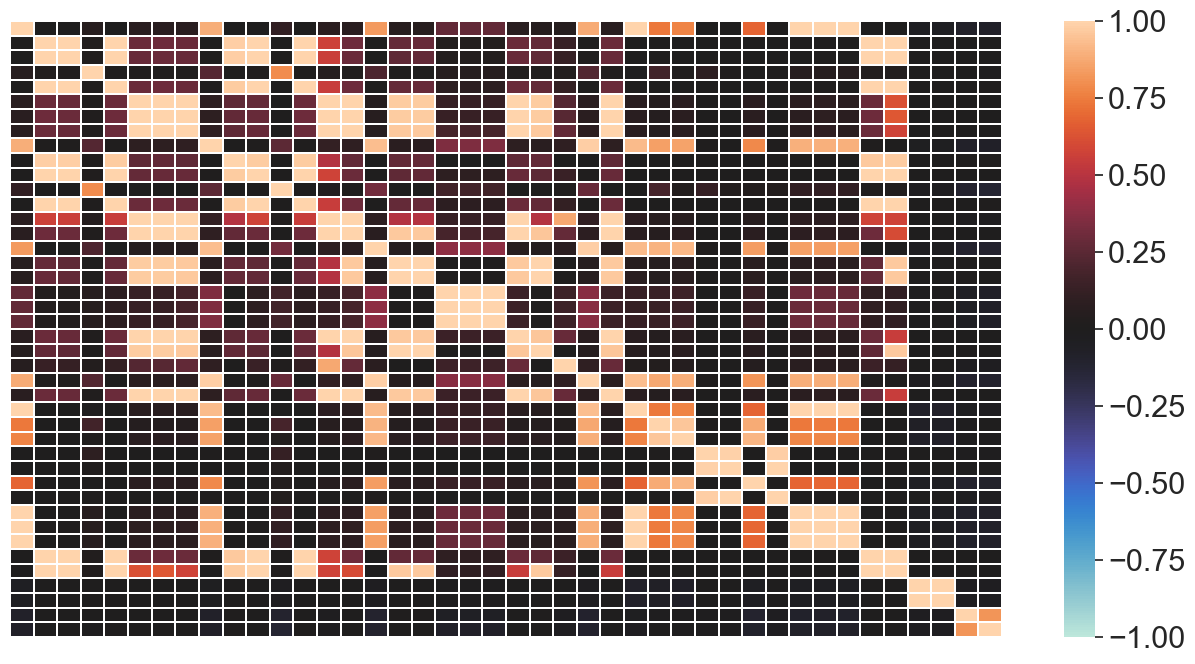

In [123]:
fig = plt.figure(figsize = (16,8))
sns.heatmap(data[corr_columns].corr(), vmin=-1, vmax=1, center=0, annot=False, linewidths=0.1,
           xticklabels=False, yticklabels=False
)
plt.show();